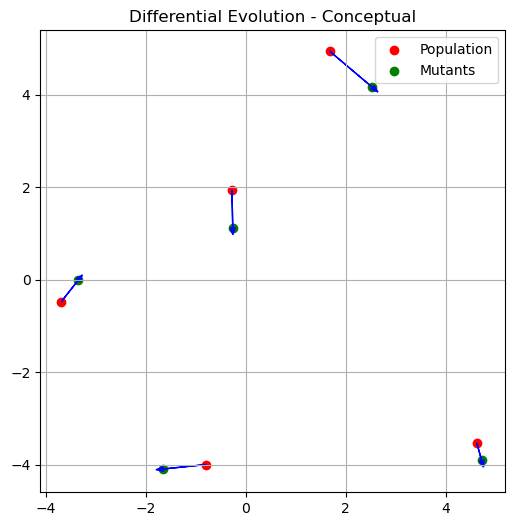

In [1]:

# Differential Evolution 

import numpy as np
import matplotlib.pyplot as plt

# Conceptual points
population = np.random.uniform(-5,5,(5,2))
mutants = population + np.random.uniform(-1,1,(5,2))

plt.figure(figsize=(6,6))
plt.scatter(population[:,0], population[:,1], color='red', label='Population')
plt.scatter(mutants[:,0], mutants[:,1], color='green', label='Mutants')

# Arrows to show mutation
for i in range(len(population)):
    plt.arrow(population[i,0], population[i,1],
              mutants[i,0]-population[i,0],
              mutants[i,1]-population[i,1],
              color='blue', head_width=0.1)

plt.title("Differential Evolution - Conceptual")
plt.legend()
plt.grid(True)
plt.show()


### Conceptual / Classroom Version
- **Purpose:** Illustrates how DE generates new candidate solutions (mutants) from existing population.  
- **Red points:** Current population (candidate solutions).  
- **Green points:** Mutants generated from differences between current vectors.  
- **Blue arrows:** Conceptually show mutation directions.  
- **Note:** Simplified; does **not** perform iterative selection or crossover.



In [2]:
import numpy as np
import plotly.graph_objects as go

def f(x, y):
    return x**2 + y**2

num_particles = 8
num_iterations = 40
F = 0.8  # scaling factor
population = np.random.uniform(-5,5,(num_particles,2))
frames = []

for it in range(num_iterations):
    new_population = population.copy()
    for i in range(num_particles):
        idxs = [j for j in range(num_particles) if j != i]
        a, b, c = population[np.random.choice(idxs,3,replace=False)]
        mutant = a + F * (b - c)
        new_population[i] = mutant
    population = new_population.copy()
    frames.append(go.Frame(
        data=[go.Scatter(x=population[:,0], y=population[:,1],
                         mode='markers', marker=dict(size=10, color='red'))],
        name=f'Iteration {it+1}'
    ))

fig = go.Figure(
    data=[go.Scatter(x=population[:,0], y=population[:,1],
                     mode='markers', marker=dict(size=10, color='red'))],
    layout=go.Layout(title='Differential Evolution - Simulation',
                     updatemenus=[dict(type='buttons',
                                       showactive=False,
                                       buttons=[dict(label='Play',
                                                     method='animate',
                                                     args=[None, {"frame":{"duration":200,"redraw":True},
                                                                  "fromcurrent":True}])])])
)
fig.frames = frames
fig.show()


### Realistic / Simulation Version
- **Purpose:** Simulates DE iterations and movement of population in the search space.  
- **Red points:** Current population updated each iteration.  
- **Mutants:** Generated in each iteration and selected to form new population.  
- **Animation:** Shows population moving and converging toward the optimum.  
